# Logistic Regression

### By Ciniso Msibi

#### M22/COMP/1423X

In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing


In [2]:
churn_df = pd.read_csv("ChurnData.csv")
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [3]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ','equip', 'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


In [4]:
churn_df.shape

(200, 10)

In [5]:
X = np.asarray(churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ','equip']])
X[0:5]

array([[ 11.,  33.,   7., 136.,   5.,   5.,   0.],
       [ 33.,  33.,  12.,  33.,   2.,   0.,   0.],
       [ 23.,  30.,   9.,  30.,   1.,   2.,   0.],
       [ 38.,  35.,   5.,  76.,   2.,  10.,   1.],
       [  7.,  35.,  14.,  80.,   2.,  15.,   0.]])

In [6]:
y = np.asarray(churn_df['churn'])
y [0:5]

array([1, 1, 0, 0, 0])

In [7]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695]])

In [8]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2,random_state=4)
print ('Train set:', X_train.shape, y_train.shape)
print ('Test set:', X_test.shape, y_test.shape)

Train set: (160, 7) (160,)
Test set: (40, 7) (40,)


In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [10]:
yhat = LR.predict(X_test)
yhat

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0])

In [11]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.54132919, 0.45867081],
       [0.60593357, 0.39406643],
       [0.56277713, 0.43722287],
       [0.63432489, 0.36567511],
       [0.56431839, 0.43568161],
       [0.55386646, 0.44613354],
       [0.52237207, 0.47762793],
       [0.60514349, 0.39485651],
       [0.41069572, 0.58930428],
       [0.6333873 , 0.3666127 ],
       [0.58068791, 0.41931209],
       [0.62768628, 0.37231372],
       [0.47559883, 0.52440117],
       [0.4267593 , 0.5732407 ],
       [0.66172417, 0.33827583],
       [0.55092315, 0.44907685],
       [0.51749946, 0.48250054],
       [0.485743  , 0.514257  ],
       [0.49011451, 0.50988549],
       [0.52423349, 0.47576651],
       [0.61619519, 0.38380481],
       [0.52696302, 0.47303698],
       [0.63957168, 0.36042832],
       [0.52205164, 0.47794836],
       [0.50572852, 0.49427148],
       [0.70706202, 0.29293798],
       [0.55266286, 0.44733714],
       [0.52271594, 0.47728406],
       [0.51638863, 0.48361137],
       [0.71331391, 0.28668609],
       [0.

In [12]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, yhat)

0.375

In [13]:

from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix', 
                          cmap=plt.cm.Blues):
#This function prints and plots the confusion matrix.
#Normalization can be applied by setting `normalize=True`.

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        print(cm)
        
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[ 6  9]
 [ 1 24]]


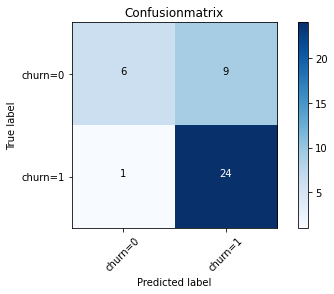

In [14]:
#compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['churn=0','churn=1'],normalize= False, title='Confusionmatrix')

In [15]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



## Decision Tree Algorithm Classifier

In [16]:
from six import StringIO

In [17]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [18]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [19]:
TelecomTree = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
TelecomTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [20]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import StandardScaler 
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.14, -0.63, -0.46,  0.48,  1.7 , -0.58, -0.86],
       [-0.12, -0.63,  0.03, -0.33, -0.64, -1.14, -0.86],
       [-0.58, -0.86, -0.26, -0.35, -1.42, -0.92, -0.86],
       [ 0.12, -0.47, -0.66,  0.01, -0.64, -0.03,  1.16],
       [-1.32, -0.47,  0.23,  0.04, -0.64,  0.53, -0.86]])

In [21]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y,test_size=0.1, random_state=3)

In [22]:
TelecomTree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [23]:
predTree = TelecomTree.predict(X_test)

In [24]:
print(predTree [0:5])
print(y_test [0:5])

[0 0 1 0 0]
[0 0 1 0 1]


In [25]:
from sklearn import metrics
Feature = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ','equip']]
Feature = pd.concat([Feature,pd.get_dummies(churn_df['churn'])], axis=1)
#Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,tenure,age,address,income,ed,employ,equip,0,1
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,1,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1,0


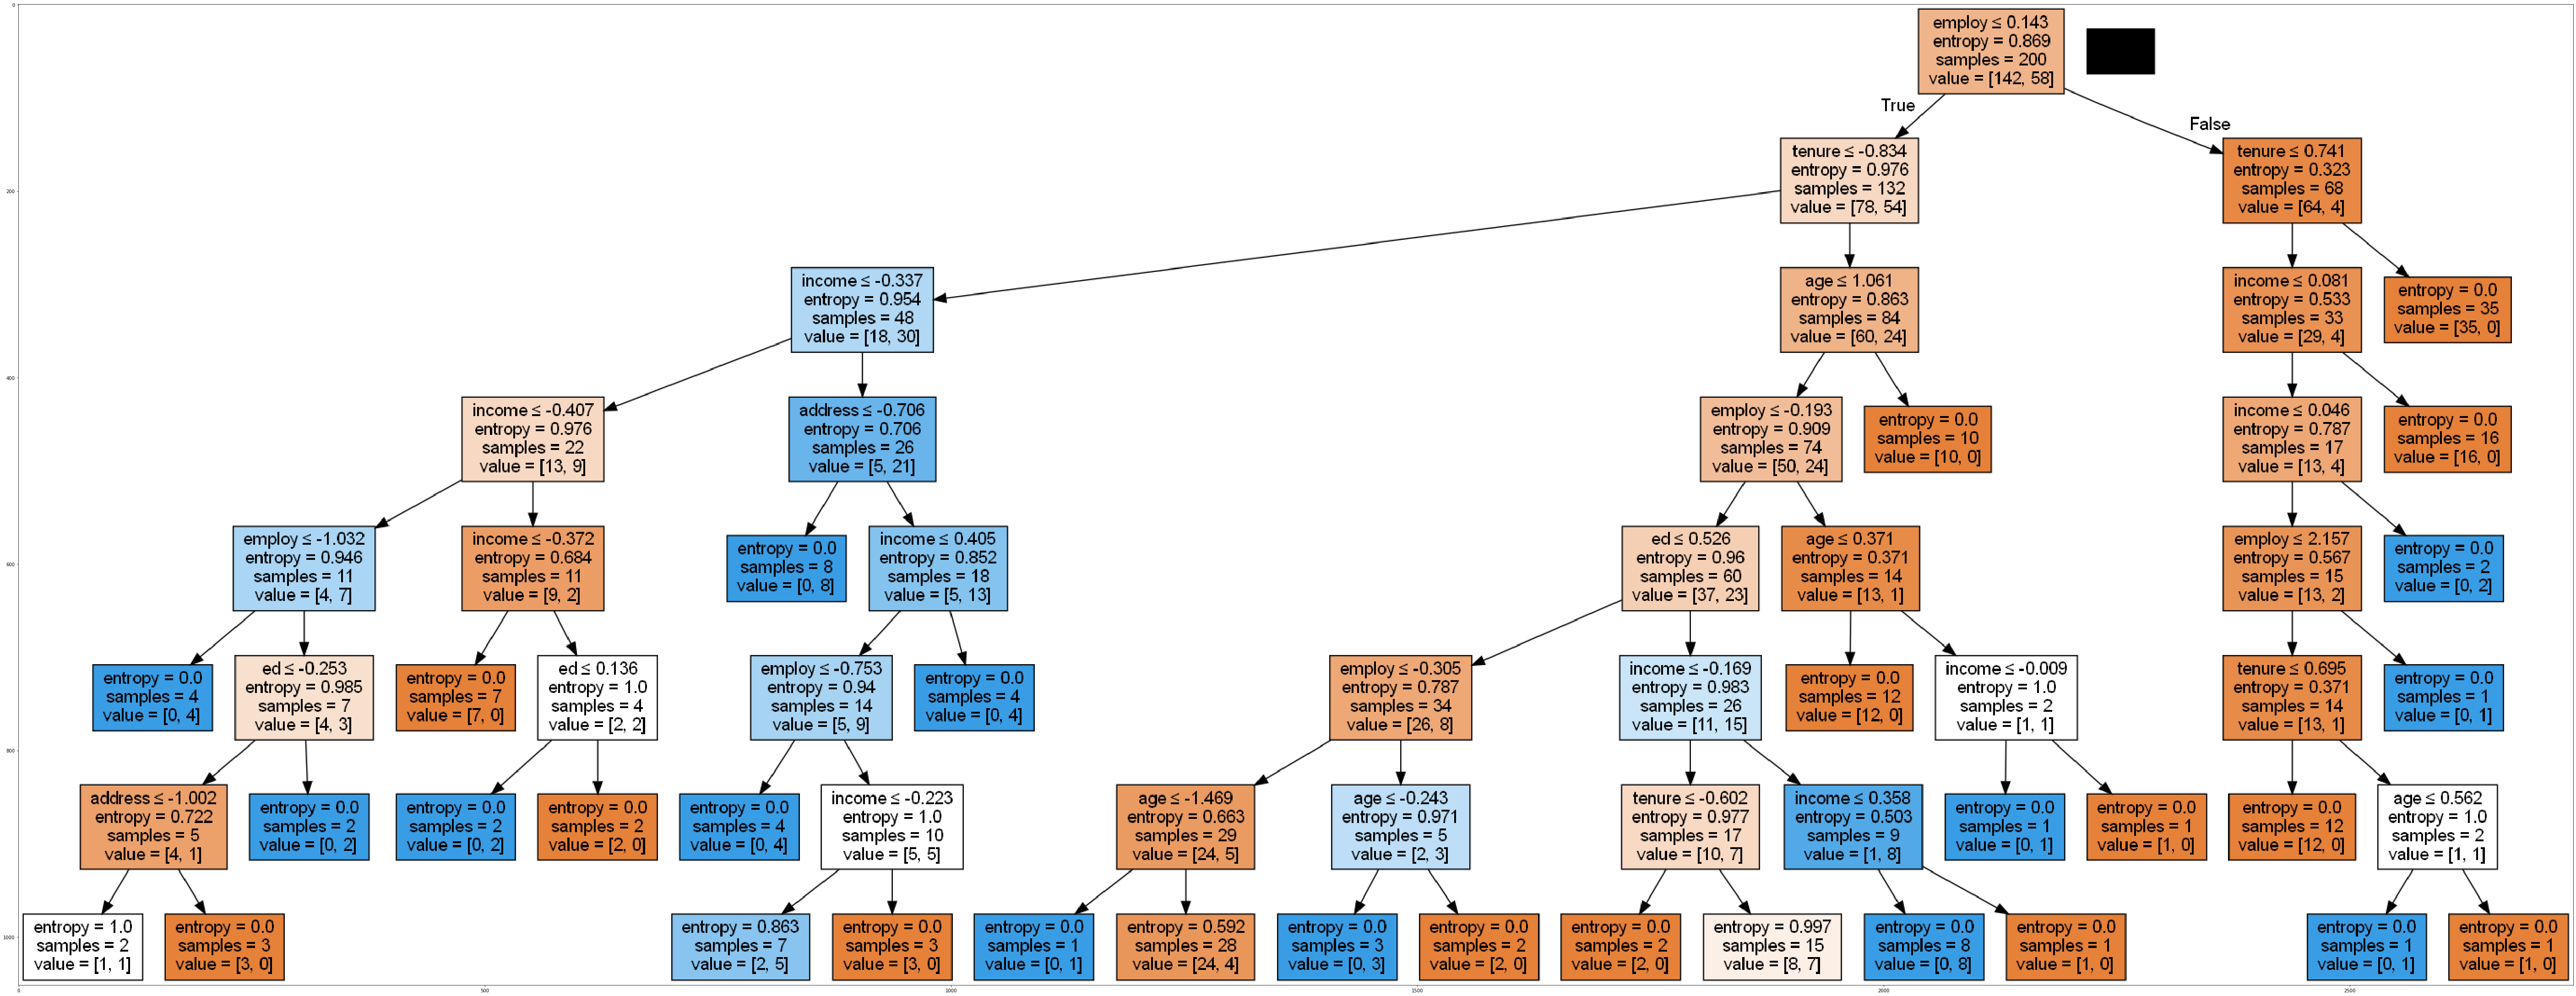

In [26]:
dot_data = StringIO()
filename = "TelecomTree.png"
featureNames = churn_df.columns[0:7]
targetNames = churn_df["churn"].unique().tolist()
out=tree.export_graphviz(TelecomTree,feature_names=featureNames,out_file=dot_data, filled=True,special_characters=True,rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [28]:
TelecomTree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

### Prediction


In [29]:
predTree = TelecomTree.predict(X_test)

In [30]:
print (predTree [0:5])
print (y_test [0:5])

[0 0 0 0 0]
[0 0 1 0 1]


## Evaluation

In [31]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [32]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))

DecisionTrees's Accuracy:  0.9


In [33]:
yhat_tree=TelecomTree.predict(X_test)
tree_jacc_test=metrics.jaccard_score(y_test, yhat_tree)
tree_f1_test=metrics.f1_score(y_test, yhat_tree, average ='macro')
tree_cnf_matrix = confusion_matrix(y_test, yhat_tree)
print("Accuracy is ", tree_jacc_test, " F1 is" , tree_f1_test)
print(classification_report(y_test, yhat_tree))
tree_cnf_matrix

Accuracy is  0.7333333333333333  F1 is 0.8860398860398859
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        25
           1       1.00      0.73      0.85        15

    accuracy                           0.90        40
   macro avg       0.93      0.87      0.89        40
weighted avg       0.91      0.90      0.90        40



array([[25,  0],
       [ 4, 11]], dtype=int64)

## Support Vector Machine

In [34]:
from sklearn import svm
EVDSVM = svm.SVC(kernel='rbf')
EVDSVM.fit(X, y)

SVC()

#### Calculate accuracy and F1 for Support Vector Machine

In [35]:
yhat_svm=EVDSVM.predict(X)
svm_jacc_test=metrics.jaccard_score(y, yhat_svm)
svm_f1_test=metrics.f1_score(y, yhat_svm, average ='macro')
svm_cnf_matrix = confusion_matrix(y, yhat_svm)
print("Accuracy is ", svm_jacc_test, " F1 is" , svm_f1_test)
print(classification_report(y, yhat_svm))
svm_cnf_matrix

Accuracy is  0.3382352941176471  F1 is 0.6799317187666702
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       142
           1       0.70      0.40      0.51        58

    accuracy                           0.78       200
   macro avg       0.74      0.66      0.68       200
weighted avg       0.76      0.78      0.75       200



array([[132,  10],
       [ 35,  23]], dtype=int64)

# K Nearest Neighbor(KNN)

Split the initial train set in train and cross validation set. Use 80% of the data set for training and 20% for cross validation

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Cross validation set:', X_cv.shape,  y_cv.shape)

Train set: (160, 7) (160,)
Cross validation set: (40, 7) (40,)


#### Import libraries

In [37]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [38]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

#### Find the best k by training and predicting

Train the model for various k between 1 and 9 and choose the one with the best accuracy on the cross validation set.

In [39]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model   
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
#Predict on the Cross Validation set
    yhat_cv=neigh.predict(X_cv)
    #Calculate 
    mean_acc[n-1] = metrics.accuracy_score(y_cv, yhat_cv)

    
    std_acc[n-1]=np.std(yhat_cv==y_cv)/np.sqrt(yhat_cv.shape[0])

mean_acc

array([0.62, 0.7 , 0.7 , 0.7 , 0.72, 0.75, 0.7 , 0.78, 0.75])

#### Display the accuracy of the model for the various K

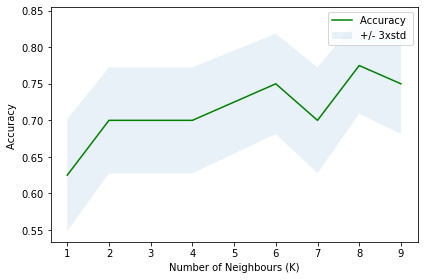

The best accuracy was 0.775 with k= 8


In [40]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was", mean_acc.max(), "with k=", mean_acc.argmax()+1)

#### Now generate and store the model on the global train set for the optimal k = 5.

In [41]:
neigh = KNeighborsClassifier(n_neighbors = mean_acc.argmax()+1).fit(X, y)
neigh

KNeighborsClassifier(n_neighbors=8)

# KNN Evaluation

#### Jaccard index for accuracy evaluation.

In [42]:
from sklearn.metrics import jaccard_score
jaccard_score( y_cv,  yhat_cv)

0.375

#### Calculate accuracy and F1 for KNN algorithm

In [43]:
#yhat_test=neigh.predict(X_test)
kn_jacc_test=metrics.jaccard_score(y_cv,  yhat_cv)
kn_f1_test=metrics.f1_score(y_cv,  yhat_cv, average ='macro')
kn_cnf_matrix = confusion_matrix(y_cv,  yhat_cv)
print("Accuracy is ", kn_jacc_test, " F1 is" , kn_f1_test)
print(classification_report(y_cv,  yhat_cv))
kn_cnf_matrix

Accuracy is  0.375  F1 is 0.6865203761755486
              precision    recall  f1-score   support

           0       0.73      0.96      0.83        25
           1       0.86      0.40      0.55        15

    accuracy                           0.75        40
   macro avg       0.79      0.68      0.69        40
weighted avg       0.78      0.75      0.72        40



array([[24,  1],
       [ 9,  6]], dtype=int64)